# 1. PCA Implementation

#### Loading Datasets

In [4]:
# UImporting the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [5]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Create a DataFrame including features and target variables
df = pd.DataFrame(np.c_[data['data'], data['target']], columns=np.append(data['feature_names'], ['target']))
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

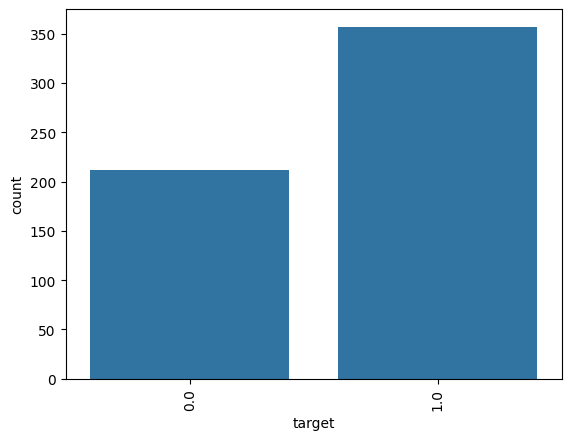

In [12]:
# Displaying features Variable

import seaborn as sns
sns.countplot(x = df['target'], data=df)
plt.xticks(rotation=90)
plt.show()

#### Standardizing the Data

In [7]:
# Droping the target column and spliting the datasets to train and test
X = df.drop("target", axis = 1)
y = df['target']


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.shape, y.shape

((569, 30), (569,))

#### Apply PCA

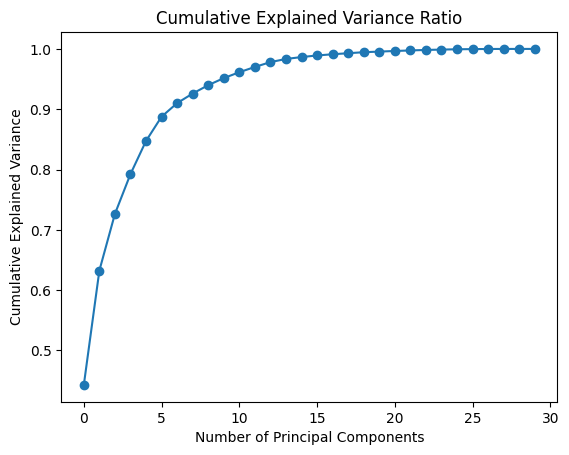

Principal Component Loadings:
                              PC1       PC2       PC3       PC4       PC5
mean radius              0.218902 -0.233857 -0.008531  0.041409  0.037786
mean texture             0.103725 -0.059706  0.064550 -0.603050 -0.049469
mean perimeter           0.227537 -0.215181 -0.009314  0.041983  0.037375
mean area                0.220995 -0.231077  0.028700  0.053434  0.010331
mean smoothness          0.142590  0.186113 -0.104292  0.159383 -0.365089
mean compactness         0.239285  0.151892 -0.074092  0.031795  0.011704
mean concavity           0.258400  0.060165  0.002734  0.019123  0.086376
mean concave points      0.260854 -0.034767 -0.025564  0.065336 -0.043861
mean symmetry            0.138167  0.190349 -0.040240  0.067125 -0.305942
mean fractal dimension   0.064363  0.366575 -0.022574  0.048587 -0.044424
radius error             0.205979 -0.105552  0.268481  0.097941 -0.154456
texture error            0.017428  0.089980  0.374634 -0.359856 -0.191651
perimete

In [8]:
# Perform PCA to acquire essential variables
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

# Choose the number of components based on the plot
n_components = 5 

# Reduce the dataset to the selected number of PCA components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the reduced dataset and feature names
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca['Target'] = y

# Display the contribution of each original feature to the principal components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=feature_names)
print("Principal Component Loadings:")
print(loadings)


# 2. Dimensionality Reduction

Principal Component Loadings:
                              PC1       PC2
mean radius              0.218902 -0.233857
mean texture             0.103725 -0.059706
mean perimeter           0.227537 -0.215181
mean area                0.220995 -0.231077
mean smoothness          0.142590  0.186113
mean compactness         0.239285  0.151892
mean concavity           0.258400  0.060165
mean concave points      0.260854 -0.034768
mean symmetry            0.138167  0.190349
mean fractal dimension   0.064363  0.366575
radius error             0.205979 -0.105552
texture error            0.017428  0.089980
perimeter error          0.211326 -0.089457
area error               0.202870 -0.152293
smoothness error         0.014531  0.204430
compactness error        0.170393  0.232716
concavity error          0.153590  0.197207
concave points error     0.183417  0.130322
symmetry error           0.042498  0.183848
fractal dimension error  0.102568  0.280092
worst radius             0.227997 -0.219866
wo

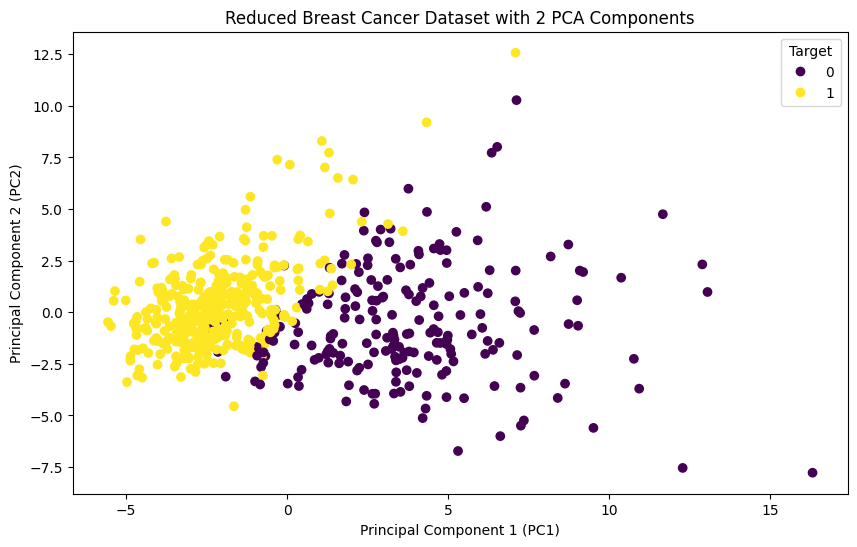

In [10]:
# Perform PCA to acquire essential variables
pca = PCA(n_components=2)  # Specify the number of components as 2
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the reduced dataset and feature names
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Display the contribution of each original feature to the principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)
print("Principal Component Loadings:")
print(loadings)

# Visualize the reduced dataset
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Target'], cmap='viridis')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Reduced Breast Cancer Dataset with 2 PCA Components')
plt.legend(*scatter.legend_elements(), title='Target')
plt.show()

# Logistic Regression

--------------Confusion Matrix--------------
[[43  6]
 [ 1 64]]


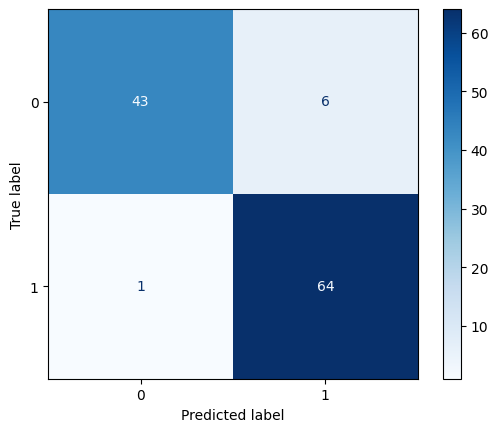

--------------Classification Report--------------
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.92        49
         1.0       0.91      0.98      0.95        65

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

--------------More Specific Classification Report--------------
Accuracy:- 0.9385964912280702
Sensitivity :- 0.5981308411214953
Specificity :- 0.8775510204081632
F1-Score :- 0.9481481481481482


In [11]:
# Importing Libraries for Logistic Regression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca[['PC1', 'PC2']], df_pca['Target'], test_size=0.2, random_state=100)

# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

logistic = LogisticRegression(C=0.01)
logistic_model = logistic.fit(X_train, y_train)

# Defining function to display Logistic regression results
def display_test_results(model_name, model):
    y_test_pred = model.predict(X_test)

    # Confusion Matrix
    print("--------------Confusion Matrix--------------")
    c_matrix =metrics.confusion_matrix(y_test, y_test_pred)
    print(c_matrix)

    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()

    # Classification report:
    print("--------------Classification Report--------------")
    print(classification_report(y_test, y_test_pred))

    print("--------------More Specific Classification Report--------------")
    TP = c_matrix[1,1]
    TN = c_matrix[0,0]
    FP = c_matrix[0,1]
    FN = c_matrix[1,0]

    #Accuracy
    print("Accuracy:-", metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity :-", TP/float(TP+TN))

    # Specificity 
    print("Specificity :-", TN/float(TN+FP))

    # F1 Score
    print("F1-Score :-", f1_score(y_test, y_test_pred))

    # Predicted Probability
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

display_test_results("LogisticRegression", logistic_model)

